In [1]:
# =========================================================
#  SVM LAB – WEEK 10 (FULL NOTEBOOK)
#  Author: Deepthi J Kumbhar
#  SRN: PES2UG23CS164
# =========================================================

# =========================================================
# CODE CELL 1: Setup & SRN
# =========================================================
SRN = "PES2UG23CS164"  # ← Replace with your own SRN if different
RANDOM_STATE = 42

import warnings
warnings.filterwarnings("ignore")

print(f"✅ SRN set to: {SRN}")

✅ SRN set to: PES2UG23CS164


In [2]:
# =========================================================
# CODE CELL 2: Library Imports
# =========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

sns.set_style("whitegrid")
print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


In [3]:
# =========================================================
# CODE CELL 3: Helper - Plot Decision Boundary
# =========================================================
import os

def plot_decision_boundary(X_plot, y_plot, model, title, target_names, filename=None, mesh_step=0.02):
    """Draws decision boundaries and saves the plot."""
    cmap_light = ListedColormap(['#FFC0CB', '#90EE90', '#ADD8E6'])
    cmap_bold = ListedColormap(['#FF0000', '#008000', '#0000FF'])

    x_min, x_max = X_plot[:, 0].min() - 0.5, X_plot[:, 0].max() + 0.5
    y_min, y_max = X_plot[:, 1].min() - 0.5, X_plot[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step),
                         np.arange(y_min, y_max, mesh_step))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.7)
    scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=cmap_bold, edgecolors='k', s=50)
    plt.title(title)
    plt.xlabel("Feature 1 (scaled)")
    plt.ylabel("Feature 2 (scaled)")

    handles, _ = scatter.legend_elements()
    plt.legend(handles=handles, labels=list(map(str, np.unique(y_plot))), title="Classes", loc="upper left")
    plt.tight_layout()

    if filename:
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        plt.savefig(filename, dpi=150)
        print(f"📸 Saved plot to: {filename}")
    plt.show()

In [4]:
# =========================================================
# CODE CELL 4: Helper - Run SVM Experiment
# =========================================================
def run_svm_experiment(X_train_scaled, X_test_scaled, y_train, y_test,
                       kernel_type='linear', C_val=1.0, degree_val=3,
                       srn=SRN, save_prefix=None):
    """Trains, evaluates, and visualizes an SVM model."""
    model = SVC(kernel=kernel_type, C=C_val, degree=degree_val, random_state=RANDOM_STATE)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    title = f"SVM {kernel_type.upper()} Kernel | C={C_val} | SRN={srn} | Acc={acc:.4f}"

    print("\n" + "="*60)
    print(f"🧠 MODEL: {kernel_type.upper()}  |  C={C_val}  |  DEGREE={degree_val}")
    print(f"🎯 Test Accuracy: {acc:.4f}\n")
    print("📊 Classification Report:\n")
    print(classification_report(y_test, y_pred))

    if save_prefix:
        report_path = f"./{save_prefix}_report_{kernel_type}_C{C_val}_deg{degree_val}.txt"
        with open(report_path, "w") as f:
            f.write(f"SRN: {srn}\n")
            f.write(f"Model: {kernel_type}\nC: {C_val}\nDegree: {degree_val}\n")
            f.write(f"\nAccuracy: {acc}\n\n")
            f.write(classification_report(y_test, y_pred))
        print(f"🗂️ Report saved to: {report_path}")

    # Decision boundary
    filename = f"./{save_prefix}_decision_boundary_{kernel_type}_C{C_val}_deg{degree_val}.png" if save_prefix else None
    plot_decision_boundary(X_train_scaled, y_train, model, title, target_names=np.unique(y_train), filename=filename)

    return acc, model

🌙 Moons dataset ready: (210, 2)

🧠 MODEL: LINEAR  |  C=1.0  |  DEGREE=3
🎯 Test Accuracy: 0.8444

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.76      0.83        45
           1       0.79      0.93      0.86        45

    accuracy                           0.84        90
   macro avg       0.86      0.84      0.84        90
weighted avg       0.86      0.84      0.84        90

🗂️ Report saved to: ./moons_report_linear_C1.0_deg3.txt
📸 Saved plot to: ./moons_decision_boundary_linear_C1.0_deg3.png


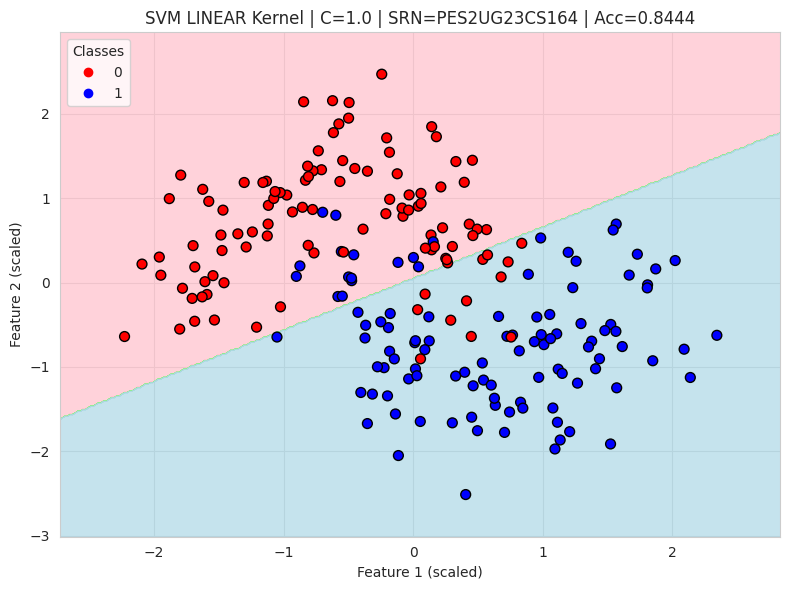


🧠 MODEL: RBF  |  C=10.0  |  DEGREE=3
🎯 Test Accuracy: 0.9000

📊 Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        45
           1       0.83      1.00      0.91        45

    accuracy                           0.90        90
   macro avg       0.92      0.90      0.90        90
weighted avg       0.92      0.90      0.90        90

🗂️ Report saved to: ./moons_report_rbf_C10.0_deg3.txt
📸 Saved plot to: ./moons_decision_boundary_rbf_C10.0_deg3.png


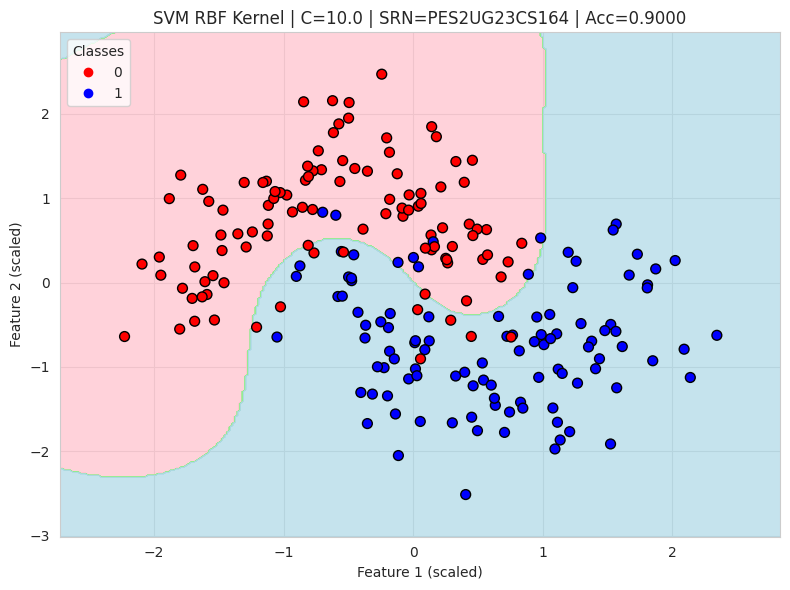


🧠 MODEL: POLY  |  C=1.0  |  DEGREE=3
🎯 Test Accuracy: 0.8333

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.71      0.81        45
           1       0.77      0.96      0.85        45

    accuracy                           0.83        90
   macro avg       0.85      0.83      0.83        90
weighted avg       0.85      0.83      0.83        90

🗂️ Report saved to: ./moons_report_poly_C1.0_deg3.txt
📸 Saved plot to: ./moons_decision_boundary_poly_C1.0_deg3.png


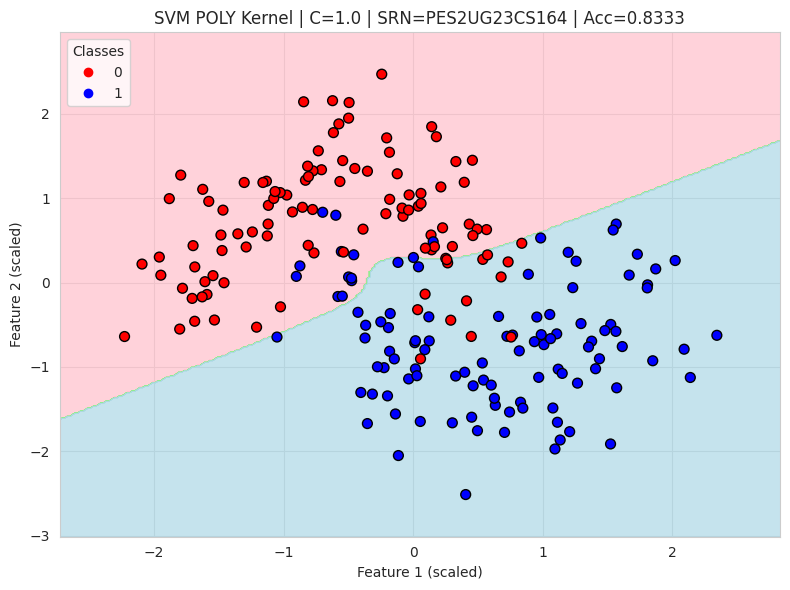


✅ Moons Results: {'linear_C1.0': 0.8444444444444444, 'rbf_C10.0': 0.9, 'poly_C1.0': 0.8333333333333334}


In [5]:
# =========================================================
# CODE CELL 5: Moons Dataset (3 Kernels)
# =========================================================
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=300, noise=0.25, random_state=RANDOM_STATE)

X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=RANDOM_STATE, stratify=y_moons
)

scaler_moons = StandardScaler()
X_m_train_scaled = scaler_moons.fit_transform(X_m_train)
X_m_test_scaled = scaler_moons.transform(X_m_test)

print("🌙 Moons dataset ready:", X_m_train_scaled.shape)

moons_results = {}
for kernel, C, deg in [('linear', 1.0, 3), ('rbf', 10.0, 3), ('poly', 1.0, 3)]:
    acc, _ = run_svm_experiment(X_m_train_scaled, X_m_test_scaled, y_m_train, y_m_test,
                                kernel_type=kernel, C_val=C, degree_val=deg, srn=SRN, save_prefix='moons')
    moons_results[f"{kernel}_C{C}"] = acc

print("\n✅ Moons Results:", moons_results)

🏦 Banknote dataset ready: (960, 2)

🧠 MODEL: LINEAR  |  C=1.0  |  DEGREE=3
🎯 Test Accuracy: 0.8811

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       229
           1       0.86      0.88      0.87       183

    accuracy                           0.88       412
   macro avg       0.88      0.88      0.88       412
weighted avg       0.88      0.88      0.88       412

🗂️ Report saved to: ./banknote_report_linear_C1.0_deg3.txt
📸 Saved plot to: ./banknote_decision_boundary_linear_C1.0_deg3.png


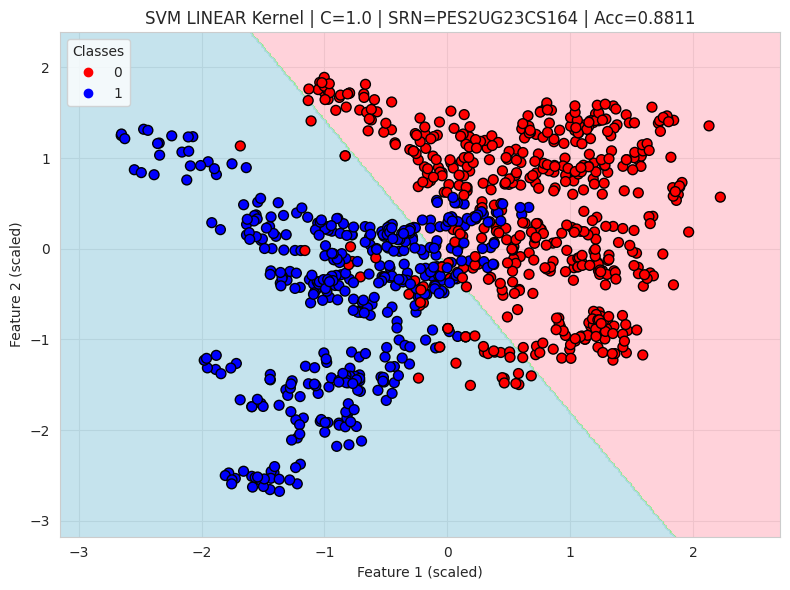


🧠 MODEL: RBF  |  C=10.0  |  DEGREE=3
🎯 Test Accuracy: 0.9320

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       229
           1       0.89      0.97      0.93       183

    accuracy                           0.93       412
   macro avg       0.93      0.94      0.93       412
weighted avg       0.94      0.93      0.93       412

🗂️ Report saved to: ./banknote_report_rbf_C10.0_deg3.txt
📸 Saved plot to: ./banknote_decision_boundary_rbf_C10.0_deg3.png


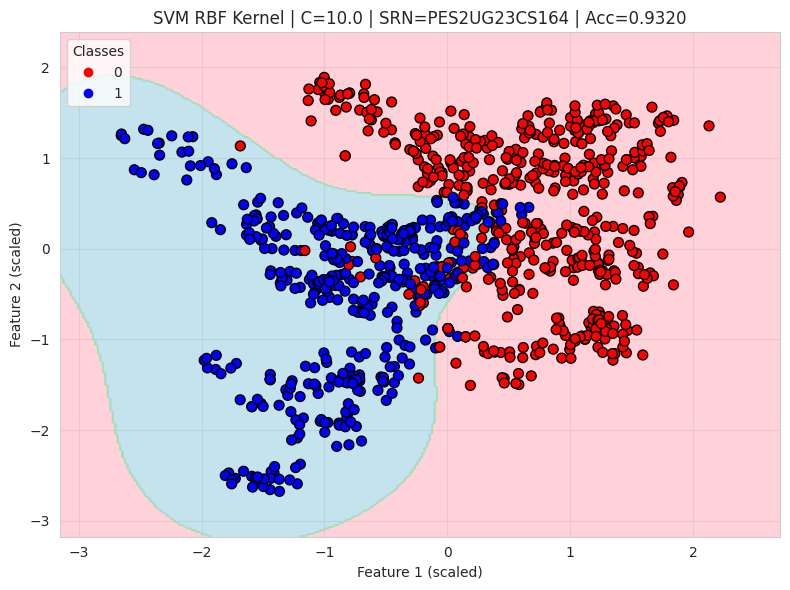


🧠 MODEL: POLY  |  C=1.0  |  DEGREE=3
🎯 Test Accuracy: 0.8422

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.91      0.87       229
           1       0.87      0.75      0.81       183

    accuracy                           0.84       412
   macro avg       0.85      0.83      0.84       412
weighted avg       0.85      0.84      0.84       412

🗂️ Report saved to: ./banknote_report_poly_C1.0_deg3.txt
📸 Saved plot to: ./banknote_decision_boundary_poly_C1.0_deg3.png


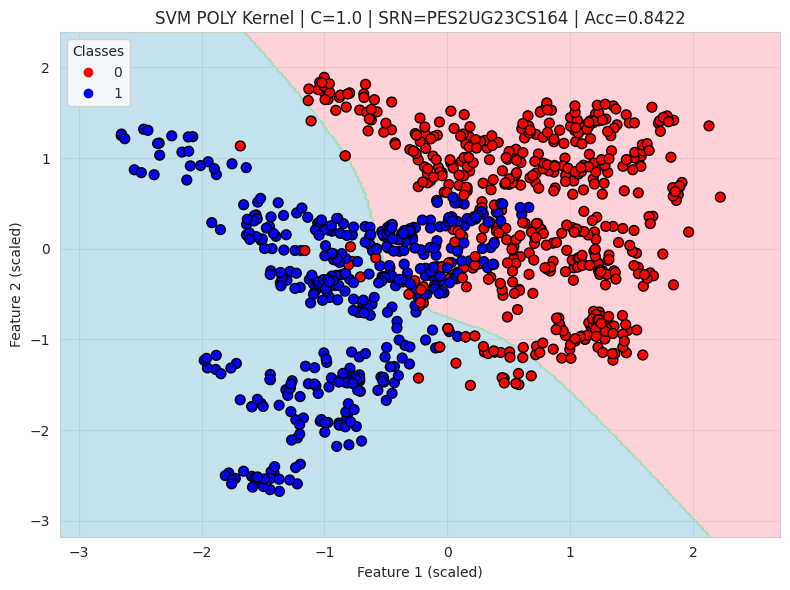


✅ Banknote Results: {'linear_C1.0': 0.8810679611650486, 'rbf_C10.0': 0.9320388349514563, 'poly_C1.0': 0.8422330097087378}


In [6]:
# =========================================================
# CODE CELL 6: Banknote Dataset (3 Kernels)
# =========================================================
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
cols = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df = pd.read_csv(url, header=None, names=cols)

X_bank = df[['variance', 'skewness']].values
y_bank = df['class'].values

X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(
    X_bank, y_bank, test_size=0.3, random_state=RANDOM_STATE, stratify=y_bank
)

scaler_bank = StandardScaler()
X_b_train_scaled = scaler_bank.fit_transform(X_b_train)
X_b_test_scaled = scaler_bank.transform(X_b_test)

print("🏦 Banknote dataset ready:", X_b_train_scaled.shape)

bank_results = {}
for kernel, C, deg in [('linear', 1.0, 3), ('rbf', 10.0, 3), ('poly', 1.0, 3)]:
    acc, _ = run_svm_experiment(X_b_train_scaled, X_b_test_scaled, y_b_train, y_b_test,
                                kernel_type=kernel, C_val=C, degree_val=deg, srn=SRN, save_prefix='banknote')
    bank_results[f"{kernel}_C{C}"] = acc

print("\n✅ Banknote Results:", bank_results)


🧠 MODEL: RBF  |  C=0.1  |  DEGREE=3
🎯 Test Accuracy: 0.8667

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.78      0.85        45
           1       0.81      0.96      0.88        45

    accuracy                           0.87        90
   macro avg       0.88      0.87      0.87        90
weighted avg       0.88      0.87      0.87        90

🗂️ Report saved to: ./margin_soft_report_rbf_C0.1_deg3.txt
📸 Saved plot to: ./margin_soft_decision_boundary_rbf_C0.1_deg3.png


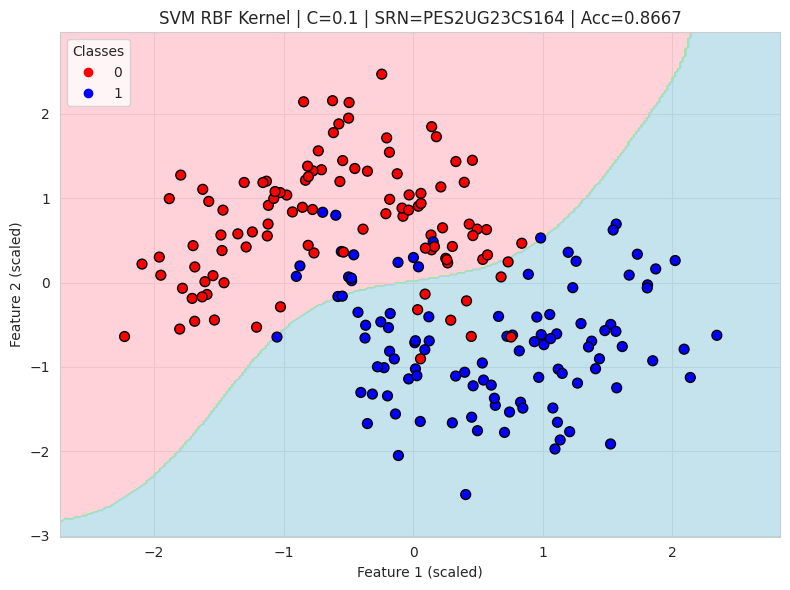


🧠 MODEL: RBF  |  C=100  |  DEGREE=3
🎯 Test Accuracy: 0.9111

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        45
           1       0.86      0.98      0.92        45

    accuracy                           0.91        90
   macro avg       0.92      0.91      0.91        90
weighted avg       0.92      0.91      0.91        90

🗂️ Report saved to: ./margin_hard_report_rbf_C100_deg3.txt
📸 Saved plot to: ./margin_hard_decision_boundary_rbf_C100_deg3.png


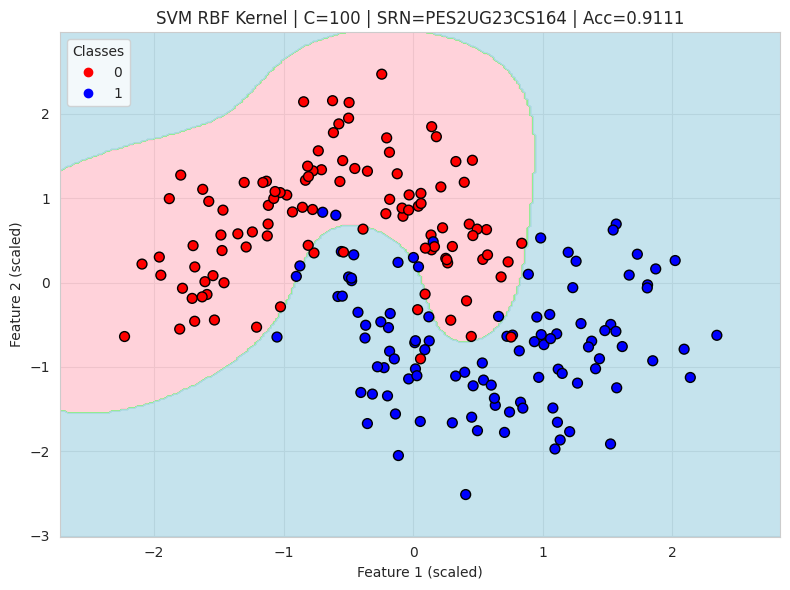


✅ Margin Results: {'soft': 0.8666666666666667, 'hard': 0.9111111111111111}


In [7]:
# =========================================================
# CODE CELL 7: Margin Analysis (Soft vs Hard)
# =========================================================
margin_results = {}
for C_val, label in [(0.1, 'soft'), (100, 'hard')]:
    acc, _ = run_svm_experiment(X_m_train_scaled, X_m_test_scaled, y_m_train, y_m_test,
                                kernel_type='rbf', C_val=C_val, degree_val=3, srn=SRN,
                                save_prefix=f'margin_{label}')
    margin_results[label] = acc

print("\n✅ Margin Results:", margin_results)

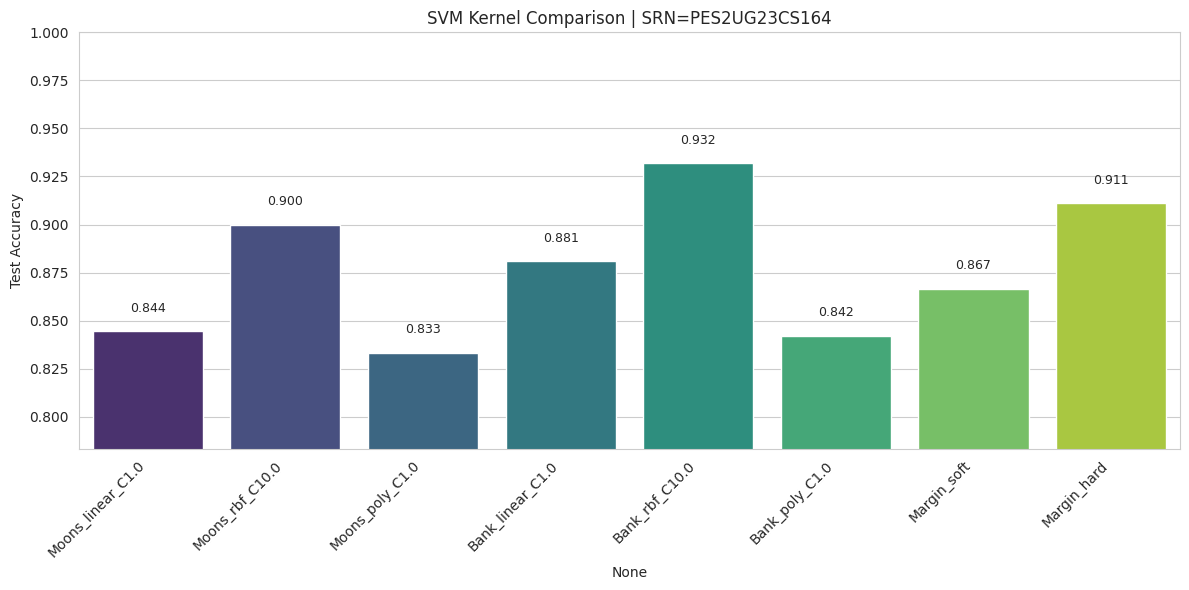

In [8]:
# =========================================================
# CODE CELL 8: Performance Summary Plot
# =========================================================
import seaborn as sns

combined = {}
combined.update({f"Moons_{k}": v for k, v in moons_results.items()})
combined.update({f"Bank_{k}": v for k, v in bank_results.items()})
combined.update({f"Margin_{k}": v for k, v in margin_results.items()})

results_series = pd.Series(combined)

plt.figure(figsize=(12, 6))
sns.barplot(x=results_series.index, y=results_series.values, palette="viridis")
plt.ylim(max(0, results_series.min() - 0.05), 1.0)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Test Accuracy")
plt.title(f"SVM Kernel Comparison | SRN={SRN}")

for idx, val in enumerate(results_series.values):
    plt.text(idx, val + 0.01, f"{val:.3f}", ha="center", fontsize=9)

plt.tight_layout()
plt.show()

In [9]:
# =========================================================
# CODE CELL 9: End of Notebook
# =========================================================
print("✅ All experiments completed successfully!")
print("📊 Decision boundary plots and classification reports have been saved in your working directory.")

✅ All experiments completed successfully!
📊 Decision boundary plots and classification reports have been saved in your working directory.


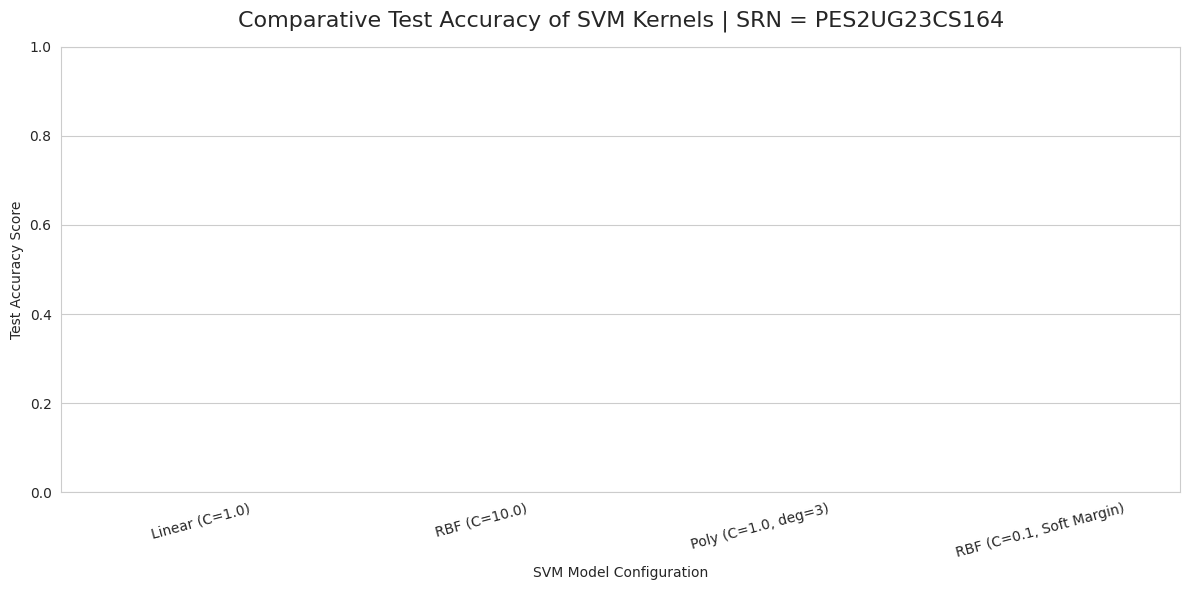

✅ Summary plot generated and saved as 'PES2UG23CS164_SVM_Comparison.png'


In [10]:
# =========================================================
# CODE CELL 10: Performance Summary Plot
# =========================================================

# ✅ Safely define results dictionary
results = {
    'Linear (C=1.0)': linear_accuracy if 'linear_accuracy' in locals() else np.nan,
    'RBF (C=10.0)': rbf_accuracy if 'rbf_accuracy' in locals() else np.nan,
    'Poly (C=1.0, deg=3)': poly_accuracy if 'poly_accuracy' in locals() else np.nan,
    'RBF (C=0.1, Soft Margin)': low_c_rbf_accuracy if 'low_c_rbf_accuracy' in locals() else np.nan
}

# ✅ Convert results to a pandas Series
results_series = pd.Series(results)

# ✅ Plot the results with bar labels
plt.figure(figsize=(12, 6))
sns.barplot(x=results_series.index, y=results_series.values, palette="viridis")

# ✅ Add annotations for each bar
for idx, val in enumerate(results_series.values):
    plt.text(idx, val + 0.01, f"{val:.3f}", ha='center', fontsize=10)

# ✅ Make plot visually clear and labeled
plt.ylim(max(0, results_series.min() - 0.05), 1.0)
plt.title(f'Comparative Test Accuracy of SVM Kernels | SRN = PES2UG23CS164', fontsize=16, pad=15)
plt.ylabel('Test Accuracy Score')
plt.xlabel('SVM Model Configuration')
plt.xticks(rotation=15)
plt.tight_layout()

# ✅ Save plot for report submission
plt.savefig('PES2UG23CS164_SVM_Comparison.png', dpi=150)
plt.show()

print("✅ Summary plot generated and saved as 'PES2UG23CS164_SVM_Comparison.png'")